# Random Forest

**Basic Description**

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

**Bias-Variance Tradeoff** 

**Upsides**

**Downsides**

**Other Notes**

## Load Packages and Prep Data

In [5]:
# custom utils
import utils
print(utils.__file__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

/Users/shea/Projects/ancient_toolmaking/utils.py


In [6]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.


In [7]:
# load data
X_train, y_train, X_test, y_test = utils.load_data()

X_train (62889, 42)
y_train (62889,)
X_test (15723, 42)
y_test (15723,)


## Model 1
- Use default hyperparameters
- Notable
    - 100 trees in forest `n_estimators=100`
    - Bootstrap sample for each tree `bootstrap=True`
        - Sample entire dataset `max_samples=None`
    - Randomly select sqrt(n) features for each tree `max_features='sqrt'`

In [8]:
# fit Random Forest model
rf_1 = RandomForestClassifier()
x = rf_1.fit(X_train, y_train)

In [9]:
# cross validation with f1 scoring
score = utils.f1_cv(rf_1, X_train, y_train)

[0.7267 0.722  0.7312 0.7071 0.7101]
0.7194


## Model 2
- Tune model with hyperparameter grid search
- Search parameters
    - Number of trees `n_estimators`
    - Maximum tree depth `max_depth`
    - Sub-sample size `max_samples`

In [15]:
%%time

# define grid to search
param_grid={
        'n_estimators': [100,200,300]
        ,'max_depth': [1,2,5,None]
        ,'max_samples': [0.8,1.0]
}

# instance
gs = GridSearchCV(RandomForestClassifier()
                ,param_grid
                ,scoring='f1_macro'
                ,cv=5
                ,n_jobs=-1
                ,verbose=1
    )

# search and fit
gs.fit(X_train, y_train)

# best params and score
print(gs.best_params_)
print(gs.best_score_)

# store best model
rf_2 = gs.best_estimator_

%%time

Fitting 5 folds for each of 24 candidates, totalling 120 fits
{'max_depth': None, 'max_samples': 1.0, 'n_estimators': 300}
0.8535192988802912


UsageError: Line magic function `%%` not found.


In [ ]:
%%time

# cross validation with f1 scoring
score = utils.f1_cv(rf_2, X_train, y_train)

[0.6633 0.6667 0.6808 0.6556 0.6454]
0.6624


## Test

Accuracy:	0.9613305348852
Precision:	0.7578378378378379
Recall:		0.6460829493087558
F1:		0.6975124378109453
CPU times: user 494 ms, sys: 42.2 ms, total: 536 ms
Wall time: 549 ms


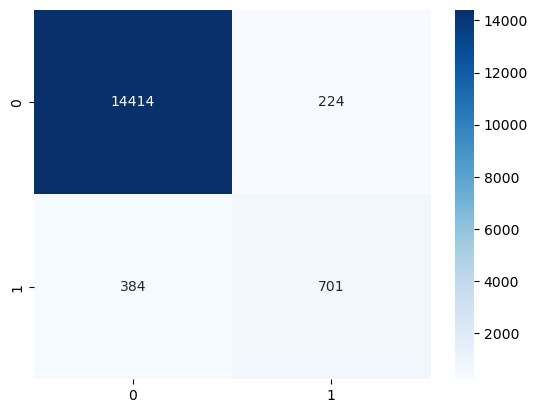

In [18]:
# test the performance of the selected model
y_pred = rf_2.predict(X_test)

# scores
utils.pred_metrics(y_test, y_pred)

# confusion matrix
utils.cm_plot(y_test,y_pred)